0.860238485217282


1.4448341712182988 -0.46579906503072


0.8668083907638165


Vec3(0, 0.8660254037844386, 0.5000000000000001) (0.5, 0.5)
Vec3(0.3254473095399483, -3.985580059192156e-17, 0.9455601772035501)
(0.14729436667462953, 0.03551619229962019) (0.05984046533846029, 0.03408802914839078, <vec3.Vec3 object at 0x10d20af98>, <vec3.Vec3 object at 0x10d20af28>)
Vec3(-0.49080139451758215, -0.8660254037844385, 0.09546722547344133)
(0.058420923433127395, 0.22898341127868593) (0.058420923433127395, 0.22898341127868596, <vec3.Vec3 object at 0x10d21a0f0>)


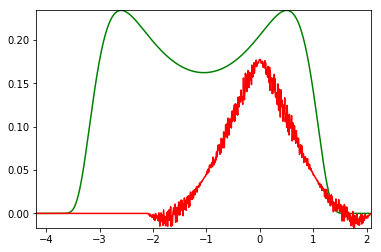

In [7]:
import brdf;
import vec3;
import math;
import random;
import matplotlib.pyplot as plt;
import microfacet;

alpha = .99

zipin= brdf.ZipinBrdf(alpha, alpha);
theta_o = math.pi /3;
wo = vec3.Vec3(0, math.sin(theta_o), math.cos(theta_o));
u = (.5, .5)
#wo = vec3.Vec3(random.uniform(0,1), random.uniform(0, 1), random.uniform(0, 1));
#u = (random.uniform(0,1), random.uniform(0, 1));
print(wo, u)
zsample =zipin.Sample(wo, u);
if zsample[0]>0:
    zeval = zipin.Eval(wo, zsample[2]);
    print(zsample[2])
    print(zeval, zsample);

beckman = brdf.Brdf(alpha, alpha);
bsample = beckman.Sample(wo, u);
if bsample[0]>0:
    beval = beckman.Eval(wo, bsample[2]);
    print(bsample[2]);
    print(beval, bsample);
    



phi_o = math.pi * 2.0 * random.uniform(0,1);
#wo = vec3.Vec3(math.sin(theta_o) * math.sin(phi_o), math.sin(theta_o)* math.cos(phi_o), math.cos(theta_o));
wo = vec3.Vec3(0, math.sin(theta_o), math.cos(theta_o));
xdata= [];              
zdata=[]; 
bdata = [];
zsamples = []
bsamples = []
sampleCount = 1000
minAngle = -theta_o - math.pi  
maxAngle = minAngle + math.pi *2.0
#minAngle += 1
#maxAngle -= 1
rangeAngle = maxAngle - minAngle
for i in range(1,sampleCount):
    thetaWi = minAngle + rangeAngle * float(i)/float(sampleCount) 
    mu = math.cos(thetaWi)
    #mu = i/sampleCount
    wi = vec3.Vec3(0, math.sin(thetaWi), mu)
    beval = beckman.Eval(wo, wi, True)
    zeval = zipin.Eval(wo, wi)
    bsamples.append(beval) 
    zsamples.append(zeval)
    xdata.append(thetaWi)
    #xdata.append(mu)
    bdata.append(beval[0])
    zdata.append(zeval[0])
    


plt.plot(xdata, bdata, color = 'green');
plt.plot(xdata, zdata, color = 'red');
plt.autoscale(True, 'both', True)
plt.show()  

